In [1]:
%load_ext lab_black

In [2]:
import os

os.chdir("../..")

In [17]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list
from utils.cluster_summary import get_cluster_summary

pd.options.display.float_format = "{:,.2f}".format

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

In [5]:
n_clusters = 5
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

In [6]:
get_metrics_of_model(agglomerative, metrics_list, X_train, X_test)

value           
sample                    test      train
metric                                   
Silhouette               -0.02      -0.03
mean_inclust_dist        11.67      13.69
min_interclust_dist       2.93       2.76
wcss                163,169.38 542,607.30

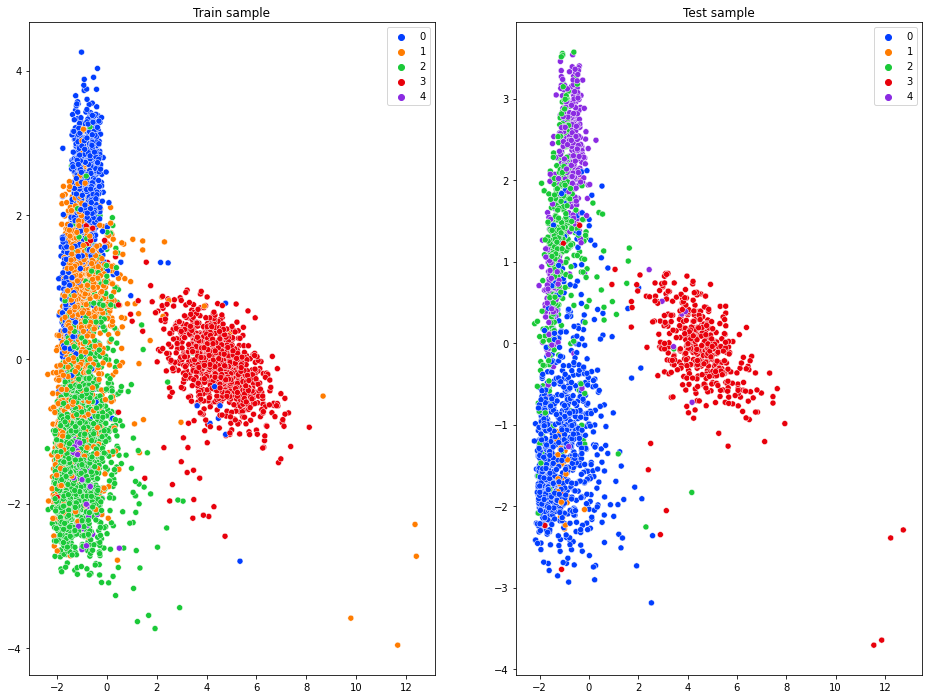

In [14]:
plot_clustering(agglomerative, X_train, X_test)

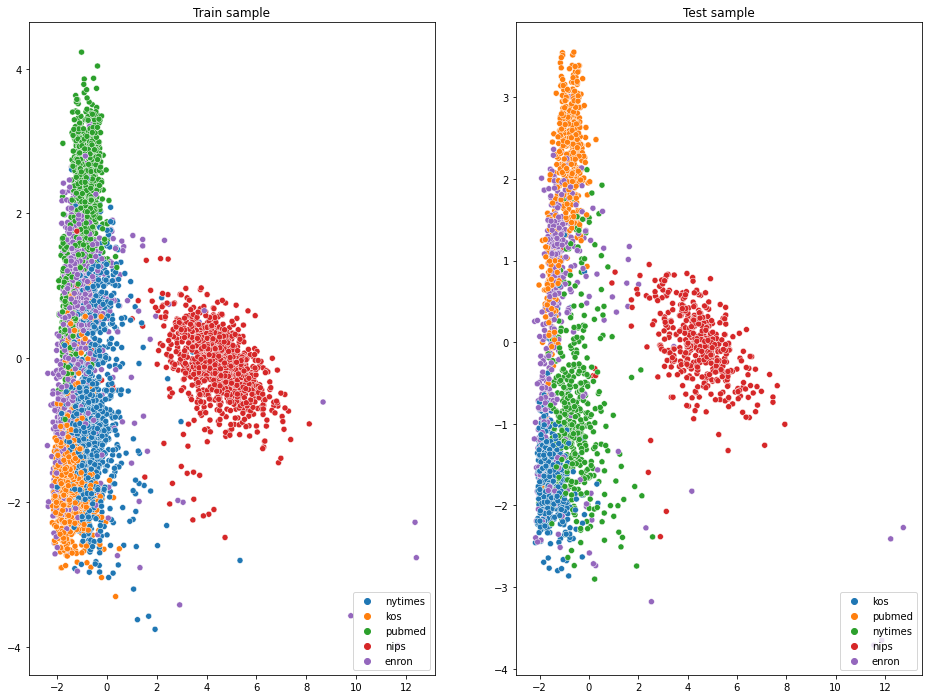

In [15]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)

In [16]:
df_train = df_train.assign(pred=agglomerative.fit_predict(X_train))
df_test = df_test.assign(pred=agglomerative.fit_predict(X_test))

In [18]:
get_cluster_summary(df_train)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.03 0.00 0.01    0.03   0.85
1      0.86 0.05 0.01    0.21   0.09
2      0.11 0.85 0.00    0.76   0.05
3      0.00 0.00 0.98    0.01   0.01
4      0.00 0.10 0.00    0.00   0.00

In [19]:
get_cluster_summary(df_test)

size                         
label enron  kos nips nytimes pubmed
pred                                
0      0.35 0.88 0.01    0.91   0.02
1      0.00 0.09 0.00    0.00   0.00
2      0.63 0.01 0.00    0.07   0.21
3      0.01 0.01 0.97    0.00   0.01
4      0.01 0.01 0.02    0.01   0.76